In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)

print(df.head(30))
print(df.shape)

<ipython-input-3-c50c7a54b4e6>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)
<ipython-input-3-c50c7a54b4e6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)
<ipython-input-3-c50c7a54b4e6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsi

    Unnamed: 0     MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0            0 2019-01-01          1  28.0     0.0  C23                2   
1            1 2019-02-01          1  28.0     0.0  C23                2   
2            2 2019-03-01          1  28.0     0.0  C23                2   
3            3 2020-11-01          2  31.0     0.0   C7                2   
4            4 2020-12-01          2  31.0     0.0   C7                2   
5            5 2019-12-01          4  43.0     0.0  C13                2   
6            6 2020-01-01          4  43.0     0.0  C13                2   
7            7 2020-02-01          4  43.0     0.0  C13                2   
8            8 2020-03-01          4  43.0     0.0  C13                2   
9            9 2020-04-01          4  43.0     0.0  C13                2   
10          10 2019-01-01          5  29.0     0.0   C9                0   
11          11 2019-02-01          5  29.0     0.0   C9                0   
12          

<ipython-input-3-c50c7a54b4e6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)


In [ ]:
df_agg=df.groupby('Driver_ID').agg(start_date=("Dateofjoining",'first'),end_date=("LastWorkingDate",'last'),age_start=("Age",'first'),age_end=("Age",'last'),
                                 income_start=("Income",'first'),income_max=("Income",'last'),grade_start=("Grade",'first'),grade_end=("Grade",'last'),
                                 agg_bizvalue=("Total Business Value",'sum'),
                                 rating_worst=("Quarterly Rating",'min'),rating_best=("Quarterly Rating",'max'),rating_median=("Quarterly Rating",'median'),
                                 gender=("Gender",'first'),edu=("Education_Level",'first')).reset_index()
df_agg['hasquit']=df_agg['end_date'].isnull()
df_agg.head()

,Driver_ID,start_date,end_date,age_start,age_end,income_start,income_max,grade_start,grade_end,agg_bizvalue,rating_worst,rating_best,rating_median,gender,edu,hasquit
0,1,2018-12-24,2019-03-11,28.0,28.0,57387,57387,1,1,1715580,2,2,2.0,0.0,2,False
1,2,2020-11-06,NaT,31.0,31.0,67016,67016,2,2,0,1,1,1.0,0.0,2,True
2,4,2019-12-07,2020-04-27,43.0,43.0,65603,65603,2,2,350000,1,1,1.0,0.0,2,False
3,5,2019-01-09,2019-03-07,29.0,29.0,46368,46368,1,1,120360,1,1,1.0,0.0,0,False
4,6,2020-07-31,NaT,31.0,31.0,78728,78728,3,3,1265000,1,2,2.0,1.0,1,True


In [ ]:
df_agg['start_day']=df_agg['start_date'].dt.day
df_agg['start_month']=df_agg['start_date'].dt.month
df_agg['start_year']=df_agg['start_date'].dt.year

df_agg['end_day']=df_agg['end_date'].dt.day
df_agg['end_month']=df_agg['end_date'].dt.month
df_agg['end_year']=df_agg['end_date'].dt.year

df_agg['days_service']=(df_agg['end_date']-df_agg['start_date']).dt.days
df_agg.drop(columns=['start_date','end_date'],inplace=True)


In [ ]:
df_agg.head(10)

,Driver_ID,age_start,age_end,income_start,income_max,grade_start,grade_end,agg_bizvalue,rating_worst,rating_best,...,gender,edu,hasquit,start_day,start_month,start_year,end_day,end_month,end_year,days_service
0,1,28.0,28.0,57387,57387,1,1,1715580,2,2,...,0.0,2,False,24,12,2018,11.0,3.0,2019.0,77.0
1,2,31.0,31.0,67016,67016,2,2,0,1,1,...,0.0,2,True,6,11,2020,NaN,NaN,NaN,NaN
2,4,43.0,43.0,65603,65603,2,2,350000,1,1,...,0.0,2,False,7,12,2019,27.0,4.0,2020.0,142.0
3,5,29.0,29.0,46368,46368,1,1,120360,1,1,...,0.0,0,False,9,1,2019,7.0,3.0,2019.0,57.0
4,6,31.0,31.0,78728,78728,3,3,1265000,1,2,...,1.0,1,True,31,7,2020,NaN,NaN,NaN,NaN
5,8,34.0,34.0,70656,70656,3,3,0,1,1,...,0.0,0,False,19,9,2020,15.0,11.0,2020.0,57.0
6,11,28.0,28.0,42172,42172,1,1,0,1,1,...,1.0,2,True,7,12,2020,NaN,NaN,NaN,NaN
7,12,35.0,35.0,28116,28116,1,1,2607180,1,4,...,0.0,2,False,29,6,2019,21.0,12.0,2019.0,175.0
8,13,29.0,31.0,119227,119227,4,4,10213040,1,2,...,0.0,2,False,28,5,2015,25.0,11.0,2020.0,2008.0
9,14,39.0,39.0,19734,19734,3,3,0,1,1,...,1.0,0,True,16,10,2020,NaN,NaN,NaN,NaN


In [ ]:
df_agg.describe(include='all')

,Driver_ID,age_start,age_end,income_start,income_max,grade_start,grade_end,agg_bizvalue,rating_worst,rating_best,...,edu,hasquit,start_day,start_month,start_year,end_day,end_month,end_year,days_service,got_promoted
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,...,2381.00000,2381,2381.000000,2381.000000,2381.000000,1616.000000,1616.000000,1616.000000,1616.000000,2381
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2338
mean,1397.559009,33.090718,33.663167,59209.060899,59334.157077,2.078538,2.096598,4.586742e+06,1.143217,1.929861,...,1.00756,NaN,15.787484,7.357413,2018.536329,16.853960,6.358911,2019.483292,357.573639,NaN
std,806.161628,5.840686,5.983375,28275.899087,28383.666384,0.931321,0.941522,9.127115e+06,0.407989,1.104857,...,0.81629,NaN,9.371835,3.143143,1.609597,9.106577,3.477823,0.506031,455.912274,NaN
min,1.000000,21.000000,21.000000,10747.000000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,1.000000,...,0.00000,NaN,1.000000,1.000000,2013.000000,1.000000,1.000000,2018.000000,0.000000,NaN
25%,695.000000,29.000000,29.000000,39104.000000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,...,0.00000,NaN,7.000000,5.000000,2018.000000,9.000000,3.000000,2019.000000,99.000000,NaN
50%,1400.000000,33.000000,33.000000,55276.000000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,1.000000,...,1.00000,NaN,15.000000,7.000000,2019.000000,17.000000,6.000000,2019.000000,176.000000,NaN
75%,2100.000000,37.000000,37.000000,75765.000000,75986.000000,3.000000,3.000000,4.173650e+06,1.000000,3.000000,...,2.00000,NaN,24.000000,10.000000,2020.000000,25.000000,9.000000,2020.000000,387.000000,NaN


In [ ]:
df_agg.isnull().sum()

Driver_ID          0
age_start          0
age_end            0
income_start       0
income_max         0
grade_start        0
grade_end          0
agg_bizvalue       0
rating_worst       0
rating_best        0
rating_median      0
gender             0
edu                0
hasquit            0
start_day          0
start_month        0
start_year         0
end_day          765
end_month        765
end_year         765
days_service     765
got_promoted       0
dtype: int64


Todo
*   Distribution of quit and retained
*   Monthy trend for joining and quitting
*   Distribution of gender in quit and retained
*   Distribution of grades in quit and retained
*   Any promotions?
*   Distribution of age at joining and quitting
*   Distribution of working period length and joining and quitting
*   what is the rating at the time of quitting? what is the avg. rating between retained and quit?



hasquit
False    1616
True      765
Name: count, dtype: int64


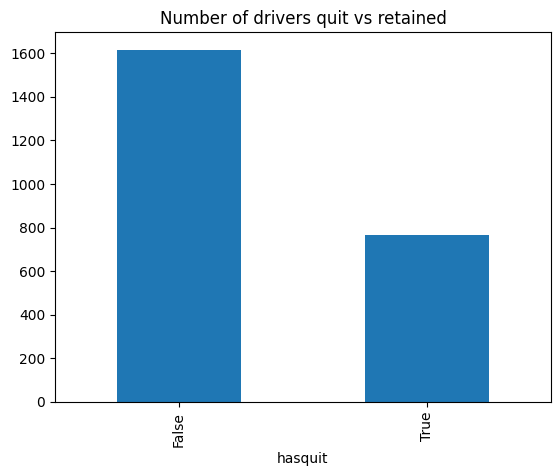

In [ ]:
print(df_agg['hasquit'].value_counts())

df_agg['hasquit'].value_counts().plot(kind='bar')
plt.title('Number of drivers quit vs retained')
plt.show()

start_year
2013     41
2014     29
2015    109
2016    108
2017     86
2018    599
2019    591
2020    818
Name: Driver_ID, dtype: int64


Text(0.5, 0, '')

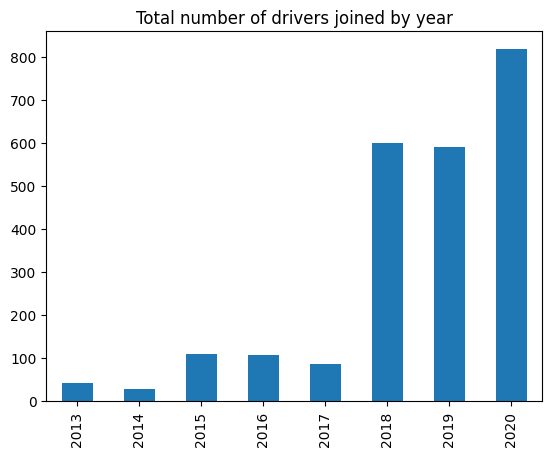

In [ ]:
print(df_agg.groupby('start_year')['Driver_ID'].count())

df_agg.groupby('start_year')['Driver_ID'].count().plot(kind='bar')
plt.title('Total number of drivers joined by year')
plt.xlabel('')
plt.show()

In [ ]:
# df_agg.loc[df_agg['hasquit'],:].groupby('end_year')['Driver_ID'].count().plot(kind='bar')
# plt.title('Total number of drivers quit by year')
# plt.xlabel('')

end_year
2018.0      5
2019.0    825
2020.0    786
Name: hasquit, dtype: int64


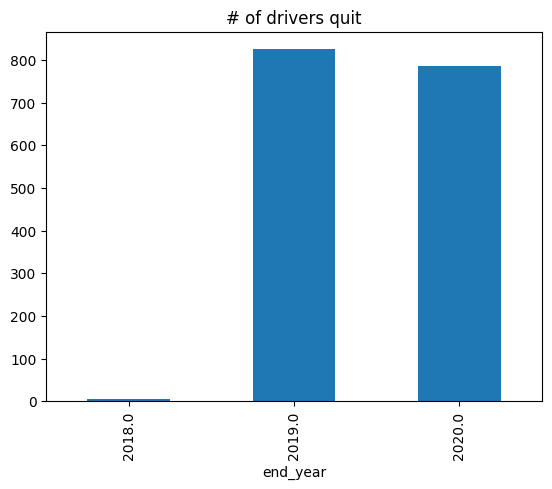

In [ ]:
print(df_agg.groupby('end_year')['hasquit'].count())
df_agg.groupby('end_year')['hasquit'].count().plot(kind='bar')
plt.title('# of drivers quit')
plt.show()

<Axes: xlabel='start_year'>

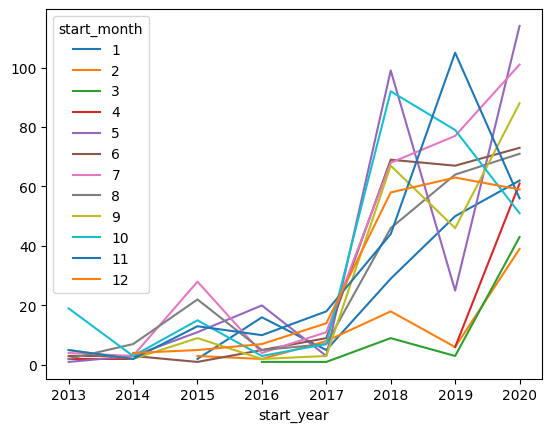

In [ ]:
df_agg.pivot_table(index='start_year',columns='start_month',values='Driver_ID',aggfunc='count').plot(kind='line')

In [ ]:
# df_agg.loc[df_agg['start_year']==2020,['start_month']].sort_values('start_month').value_counts()

start_month
5              114
7              101
9               88
6               73
8               71
1               62
4               61
12              59
11              56
10              51
3               43
2               39
Name: count, dtype: int64

Most drivers join from May onwards in the 2nd half of the year

Most drivers quit in August

Most drivers joined since 2018. This is probably the expansion phase of the service

hasquit  False  True 
gender               
0.0        948    456
1.0        668    309


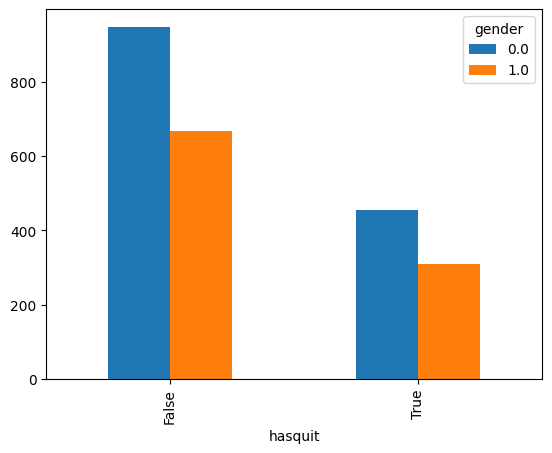

In [ ]:
print(pd.crosstab(index=df_agg['gender'],columns=df_agg['hasquit'],values=df_agg['Driver_ID'],aggfunc='count'))

df_agg.pivot_table(index='hasquit',columns='gender',values='Driver_ID',aggfunc='count').plot(kind='bar')
# plt.xticks(['Male','Female'])
plt.show()

hasquit       False  True 
got_promoted              
False          1613    725
True              3     40


hasquit    False  True 
grade_end              
1            596    145
2            600    255
3            337    286
4             70     68
5             13     11


<Axes: xlabel='hasquit'>

<Figure size 640x480 with 0 Axes>

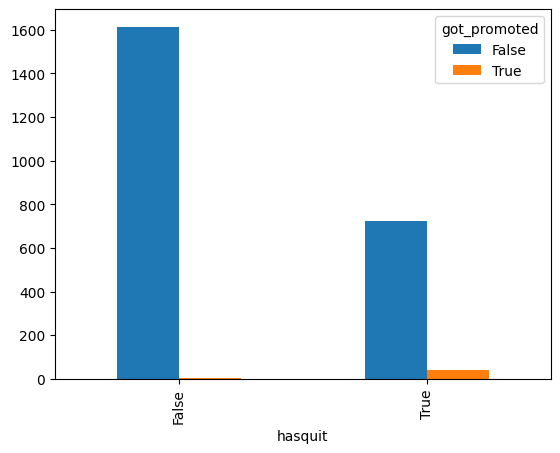

<Figure size 640x480 with 0 Axes>

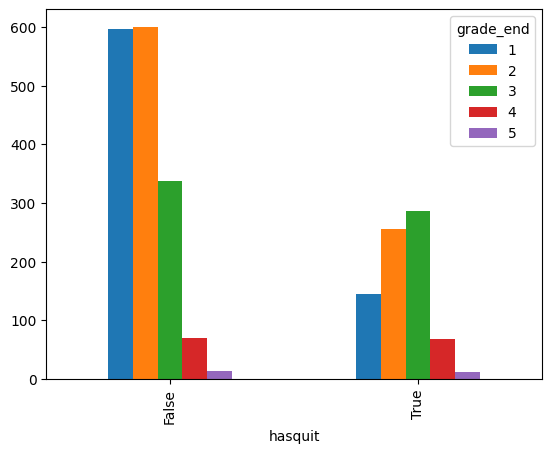

In [ ]:
df_agg['got_promoted']=df_agg['grade_end']>df_agg['grade_start']

print(pd.crosstab(index=df_agg['got_promoted'],columns=df_agg['hasquit'],values=df_agg['Driver_ID'],aggfunc='count'))
print('\n')
print(pd.crosstab(index=df_agg['grade_end'],columns=df_agg['hasquit'],values=df_agg['Driver_ID'],aggfunc='count'))

plt.figure()
# plt.subplot(1,2,1)
df_agg.pivot_table(index='hasquit',columns='got_promoted',values='Driver_ID',aggfunc='count').plot(kind='bar')

plt.figure()
# plt.subplot(1,2,2)
df_agg.pivot_table(index='hasquit',columns='grade_end',values='Driver_ID',aggfunc='count').plot(kind='bar')
# plt.xticks(['Male','Female'])

# plt.show()

         age_end  age_start
hasquit                    
False       33.0       32.0
True        34.0       33.0


<Axes: xlabel='hasquit', ylabel='age_end'>

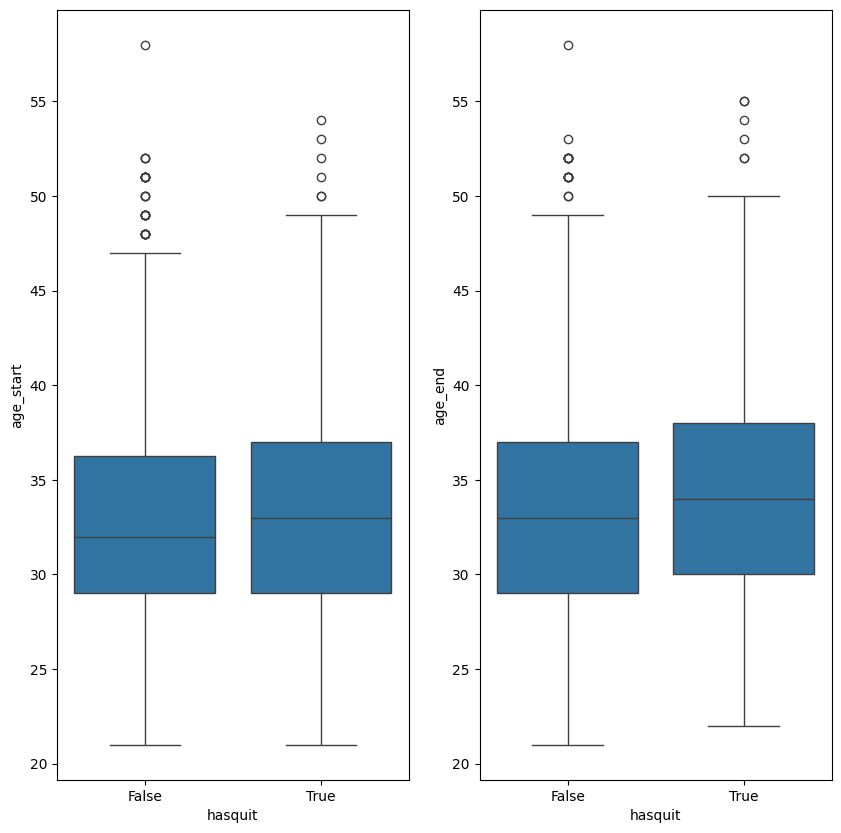

In [ ]:
import seaborn as sns

print(df_agg.pivot_table(index='hasquit',values=['age_start','age_end'],aggfunc='median'))

plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
sns.boxplot(df_agg,x='hasquit',y='age_start')

plt.subplot(1,2,2)
sns.boxplot(df_agg,x='hasquit',y='age_end')


edu        0    1    2
hasquit               
False    542  527  547
True     242  268  255


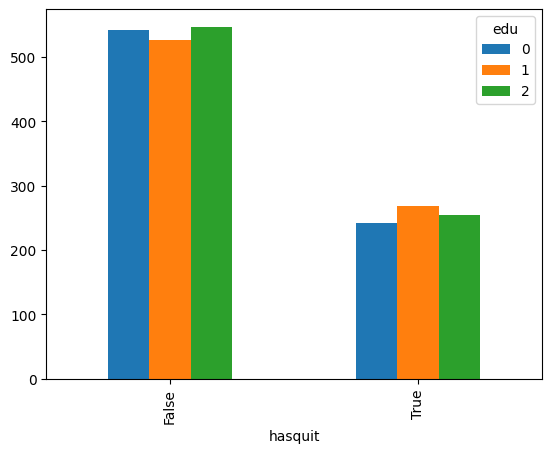

In [ ]:
print(df_agg.pivot_table(index='hasquit',columns='edu',values='Driver_ID',aggfunc='count'))

df_agg.pivot_table(index='hasquit',columns='edu',values='Driver_ID',aggfunc='count').plot(kind='bar')
plt.show()

In [ ]:
df.drop(columns=[df.columns[0],'Driver_ID'],axis=1, inplace=True)
df.describe(include='all')

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-12-11 02:09:29.849246464,34.668435,0.418749,NaN,1.021671,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.690536,2.252670,5.716621e+05,2.008899
min,2019-01-01 00:00:00,21.000000,0.000000,NaN,0.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-6.000000e+06,1.000000
25%,2019-06-01 00:00:00,30.000000,0.000000,NaN,0.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000
50%,2019-12-01 00:00:00,34.000000,0.000000,NaN,1.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,1.000000,2.000000,2.500000e+05,2.000000
75%,2020-07-01 00:00:00,39.000000,1.000000,NaN,2.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,6.997000e+05,3.000000
max,2020-12-01 00:00:00,58.000000,1.000000,NaN,2.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
print(df.info())
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Age                   19043 non-null  float64
 2   Gender                19052 non-null  float64
 3   City                  19104 non-null  object 
 4   Education_Level       19104 non-null  int64  
 5   Income                19104 non-null  int64  
 6   Dateofjoining         19104 non-null  object 
 7   LastWorkingDate       1616 non-null   object 
 8   Joining Designation   19104 non-null  int64  
 9   Grade                 19104 non-null  int64  
 10  Total Business Value  19104 non-null  int64  
 11  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.7+ MB
None


MMM-YY                      0
Age                        61
Gender                     52
City              

# Feature Engineering

In [ ]:
#Using KNN imputer to fill the missing rows for Age and Gender
# from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


# print(df['Gender'].value_counts())

# knnimputer=KNNImputer(n_neighbors=5)
simpleimp=SimpleImputer(strategy='most_frequent')

df['Age']=simpleimp.fit_transform(df[['Age']])
df['Gender']=simpleimp.fit_transform(df[['Gender']])

# print(df['Gender'].value_counts())

print(df.isnull().sum())

MMM-YY                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


In [ ]:
# df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
# df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
# df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

df['join_date']=df['Dateofjoining'].dt.day
df['join_month']=df['Dateofjoining'].dt.month
df['join_year']=df['Dateofjoining'].dt.year

df['reporting_date']=df['MMM-YY'].dt.day
df['reporting_month']=df['MMM-YY'].dt.month
df['reporting_year']=df['MMM-YY'].dt.year

df['days_service']=(df['LastWorkingDate']-df['Dateofjoining']).dt.days


df['has_quit']=df['LastWorkingDate'].isna()

df.drop(columns=['Dateofjoining','MMM-YY','LastWorkingDate'],inplace=True)


# ToDO: Analyse the trends in joining months, years, or quitting months/years

<Axes: xlabel='days_service', ylabel='Total Business Value'>

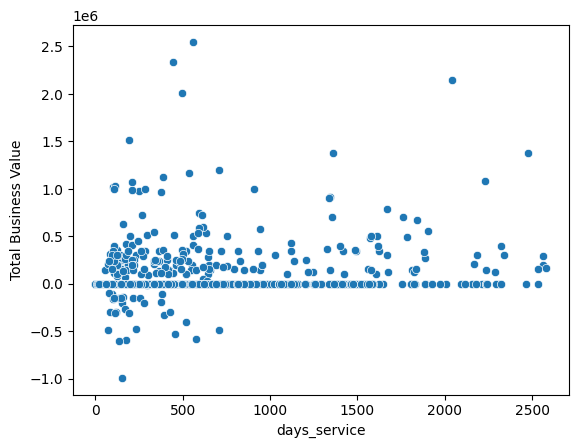

In [ ]:
sns.scatterplot(data=df,x='days_service',y='Total Business Value')

<Axes: xlabel='has_quit', ylabel='count'>

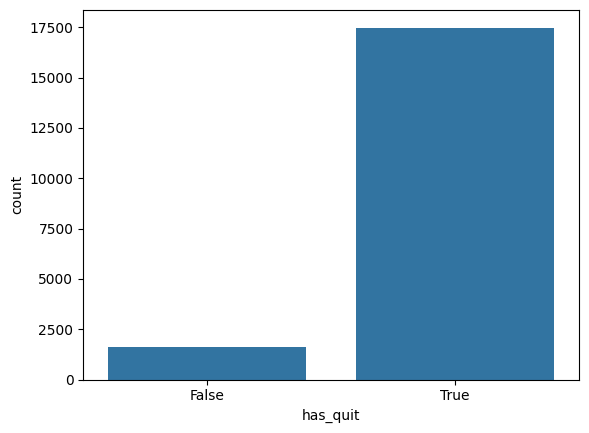

In [ ]:
sns.countplot(data=df,x='has_quit')

In [ ]:
df.describe(include='all')

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,join_date,join_month,join_year,reporting_date,reporting_month,reporting_year,has_quit
count,19104.000000,19104.000000,19104,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.000000,19104.0,19104.000000,19104.000000,19104
unique,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17488
mean,34.672686,0.417609,NaN,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,16.059307,7.093645,2017.776330,1.0,6.422268,2019.491834,NaN
std,6.248364,0.493178,NaN,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,9.219251,3.082911,1.920872,0.0,3.511325,0.499946,NaN
min,21.000000,0.000000,NaN,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,1.000000,1.000000,2013.000000,1.0,1.000000,2019.000000,NaN
25%,30.000000,0.000000,NaN,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,8.000000,5.000000,2016.000000,1.0,3.000000,2019.000000,NaN
50%,34.000000,0.000000,NaN,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,16.000000,7.000000,2018.000000,1.0,6.000000,2019.000000,NaN
75%,39.000000,1.000000,NaN,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,24.000000,10.000000,2019.000000,1.0,9.000000,2020.000000,NaN


In [ ]:
print(df.head())
print(df.shape)

    Age  Gender City  Education_Level  Income  Joining Designation  Grade  \
0  28.0     0.0  C23                2   57387                    1      1   
1  28.0     0.0  C23                2   57387                    1      1   
2  28.0     0.0  C23                2   57387                    1      1   
3  31.0     0.0   C7                2   67016                    2      2   
4  31.0     0.0   C7                2   67016                    2      2   

   Total Business Value  Quarterly Rating  join_date  join_month  join_year  \
0               2381060                 2         24          12       2018   
1               -665480                 2         24          12       2018   
2                     0                 2         24          12       2018   
3                     0                 1          6          11       2020   
4                     0                 1          6          11       2020   

   reporting_date  reporting_month  reporting_year  has_quit  

In [ ]:
for f in df.columns:
  print(df[f].value_counts())
  print('\n')

Age
36.0    1344
33.0    1250
34.0    1234
30.0    1146
32.0    1143
35.0    1138
31.0    1076
29.0    1013
37.0     862
38.0     854
39.0     788
28.0     772
27.0     744
40.0     701
41.0     661
26.0     566
42.0     478
25.0     449
44.0     407
43.0     399
45.0     371
46.0     350
24.0     274
47.0     224
23.0     193
48.0     144
49.0      99
22.0      92
52.0      78
51.0      72
50.0      69
21.0      35
53.0      26
54.0      24
55.0      21
58.0       7
Name: count, dtype: int64


Gender
0.0    11126
1.0     7978
Name: count, dtype: int64


City
C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: count, dtype: int64


Education_Level
1    6864
2    6327
0    5913
Name: count,

In [ ]:
df['age_group']=pd.cut(df['Age'],bins=[20,30,40,50,60])
df['joindate_group']=pd.cut(df['join_date'],bins=[1,10,20,30])

df['age_group'].value_counts()
df['joindate_group'].value_counts()

df.drop(columns=['Age','join_date'],inplace=True)

joindate_group
(20, 30]    6316
(10, 20]    5838
(1, 10]     5736
Name: count, dtype: int64

6648


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4443087550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4443087fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44430876a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4443086fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44430849d0>],
 'means': []}

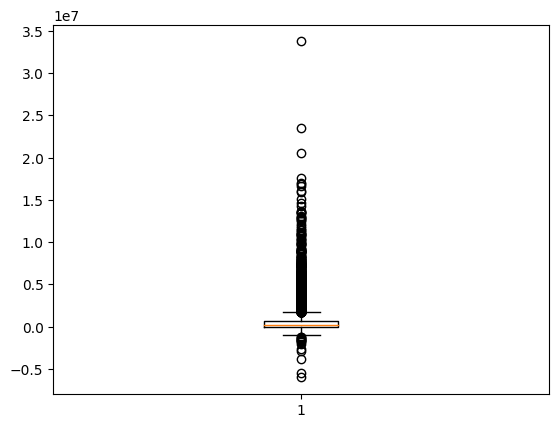

In [ ]:
print(np.sum(df['Total Business Value']<=0))

plt.boxplot(df['Total Business Value'])

<Figure size 1500x1000 with 0 Axes>

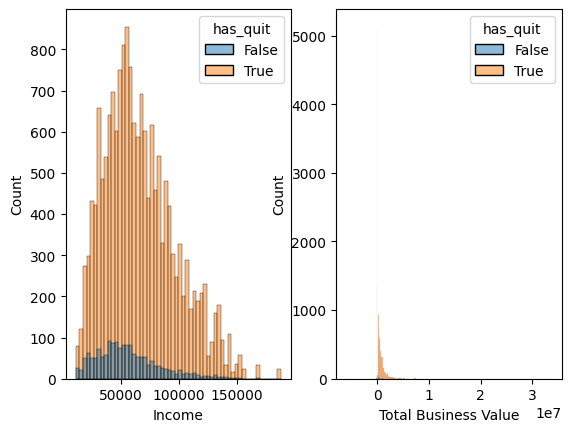

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import seaborn as sns

plt.subplot(1,2,1)
sns.histplot(data=df, x='Income',hue='has_quit');

plt.subplot(1,2,2)
sns.histplot(data=df,x='Total Business Value',hue='has_quit');
plt.xscale('log')
plt.figure(figsize=(15,10))



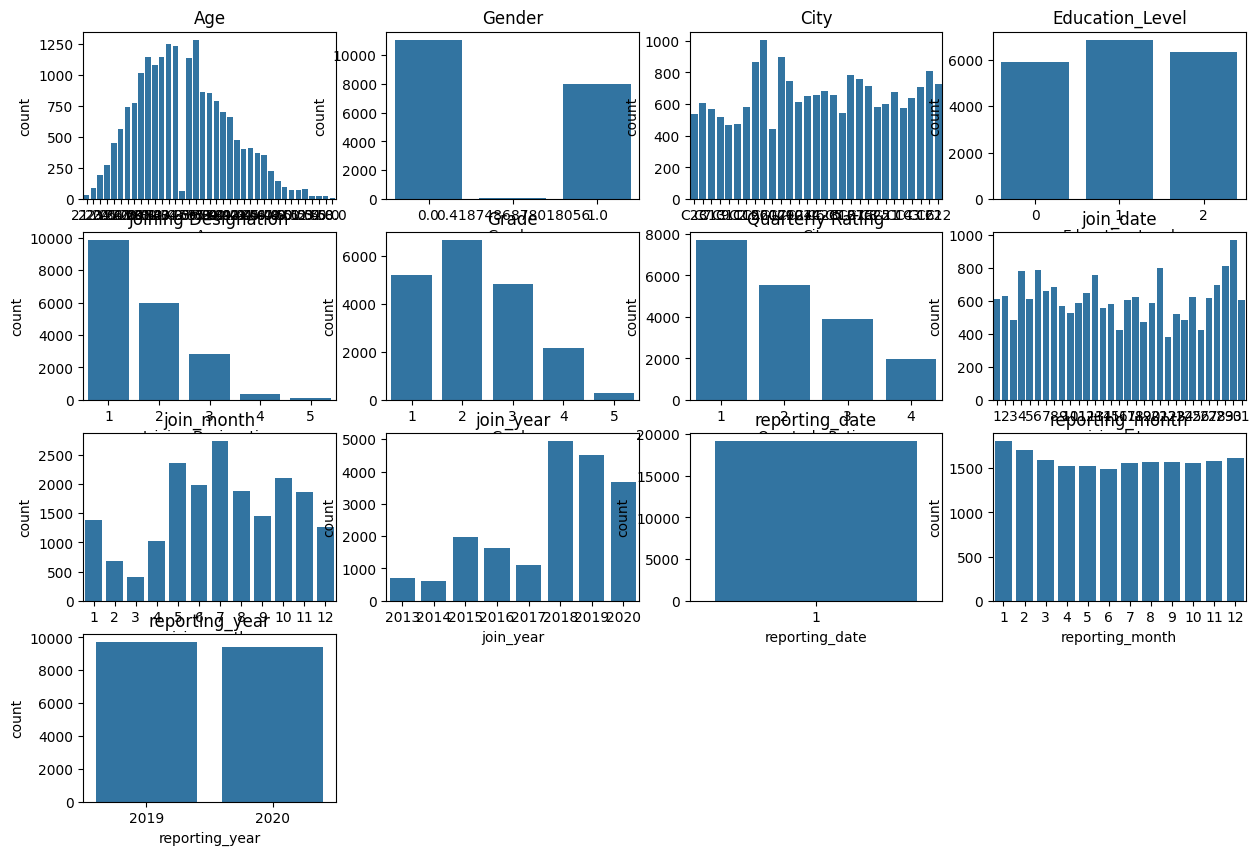

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
pltinx=1
for f in df.columns:
  if f in ['Income','Total Business Value','has_quit']:
    continue

  plt.subplot(4,4,pltinx)
  sns.countplot(data=df, x=f);
  plt.title(f)
  pltinx+=1

plt.show()
plt.tight_layout()

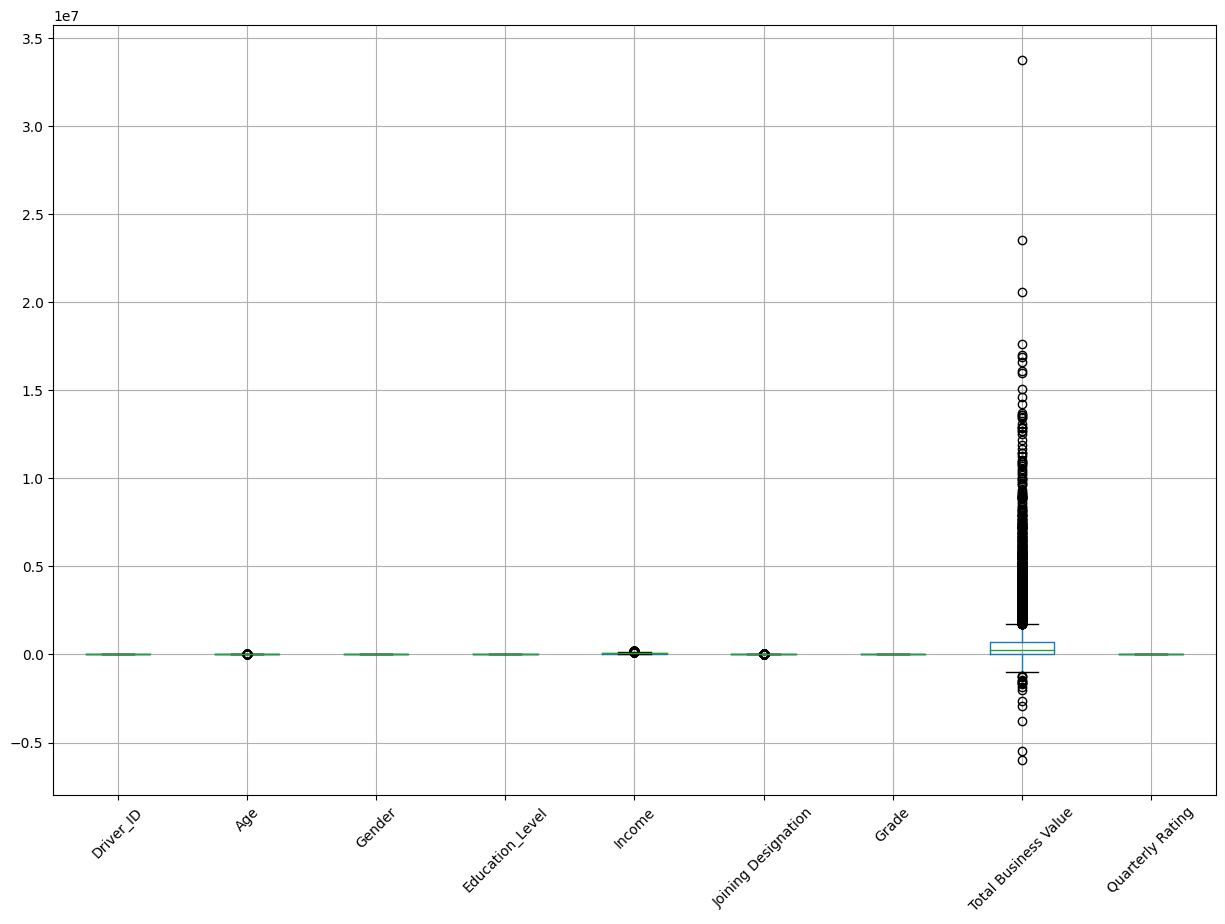

In [ ]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
for f in df.columns:
  print(df[f].value_counts())
  print('\n')

MMM-YY
01/01/19    1022
02/01/19     944
03/01/19     870
12/01/20     819
10/01/20     818
08/01/20     812
09/01/20     809
07/01/20     806
11/01/20     805
12/01/19     795
04/01/19     794
01/01/20     782
11/01/19     781
06/01/20     770
05/01/20     766
05/01/19     764
09/01/19     762
02/01/20     761
07/01/19     757
08/01/19     754
10/01/19     739
04/01/20     729
06/01/19     726
03/01/20     719
Name: count, dtype: int64


Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64


Age
36.0    1283
33.0    1250
34.0    1234
30.0    1146
32.0    1143
35.0    1138
31.0    1076
29.0    1013
37.0     862
38.0     854
39.0     788
28.0     772
27.0     744
40.0     701
41.0     661
26.0     566
42.0     478
25.0     449
44.0     407
43.0     399
45.0     371
46.0     350
24.0     274
47.0     224
23.0     193
48.0     144
49.0      99
22.0      92
52.0      78
51.